In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r'/kaggle/input/penguins/penguins.csv')

In [6]:
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [10]:
df['species'].value_counts(dropna = False)

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [14]:
df.isnull().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [15]:
df_sub = df.dropna()

In [16]:
df_sub.isnull().sum()

Unnamed: 0           0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [20]:
df_sub['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [22]:
encoded_df = pd.get_dummies(df_sub, columns=['sex'])
encoded_df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_FEMALE,sex_MALE
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,0,1
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,1,0
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,1,0
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,1,0
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007,0,1


In [33]:
encoded_df = encoded_df.drop('island')
encoded_df.head()

,Unnamed: 0,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_FEMALE,sex_MALE
0,1,Adelie,39.1,18.7,181.0,3750.0,2007,0,1
1,2,Adelie,39.5,17.4,186.0,3800.0,2007,1,0
2,3,Adelie,40.3,18.0,195.0,3250.0,2007,1,0
4,5,Adelie,36.7,19.3,193.0,3450.0,2007,1,0
5,6,Adelie,39.3,20.6,190.0,3650.0,2007,0,1


In [38]:
X = encoded_df.drop('species', axis=1)
X.head()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_FEMALE,sex_MALE
0,1,39.1,18.7,181.0,3750.0,2007,0,1
1,2,39.5,17.4,186.0,3800.0,2007,1,0
2,3,40.3,18.0,195.0,3250.0,2007,1,0
4,5,36.7,19.3,193.0,3450.0,2007,1,0
5,6,39.3,20.6,190.0,3650.0,2007,0,1


In [39]:
X_scaled = StandardScaler().fit_transform(X)

## Data Modeling

In [48]:
num_clusters = [i for i in range(2,11)]

def kmeans_inertia(num_clusters, x_vals):

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state = 42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

In [49]:
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[1824.197875220601,
 1334.187448812042,
 1003.1018212848426,
 767.9071909036802,
 597.797175627275,
 531.3042496234484,
 466.1255227460912,
 414.33115335852654,
 367.31386314950026]

Text(0, 0.5, 'Inertia')

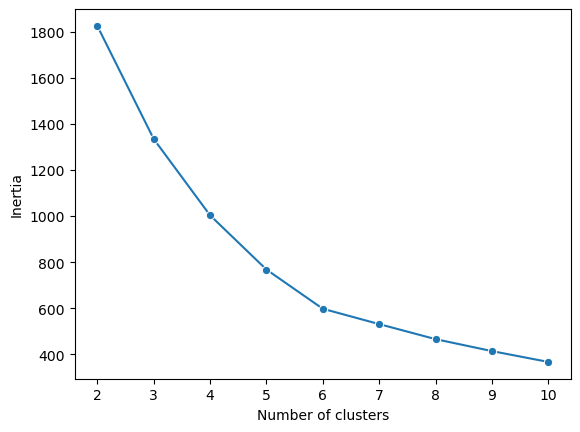

In [53]:
plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel('Number of clusters')
plot.set_ylabel('Inertia')

This plot illustrates an elbow at 6 clusters, though it isn't an entirely clear method at confirming if a six-cluser is the most optimal.

In [57]:
def kmeans_score(num_clusters, x_vals):
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num,random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals,kms.labels_))
    return sil_score

sil_score = kmeans_score(num_clusters,X_scaled)
sil_score

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

[0.3016036701400586,
 0.34404853046553147,
 0.38705780071852136,
 0.44559540142375226,
 0.4831159803348607,
 0.4644682716501647,
 0.4448763957383864,
 0.4326346116124697,
 0.4159573757314796]

Text(0, 0.5, 'Silhouette Score')

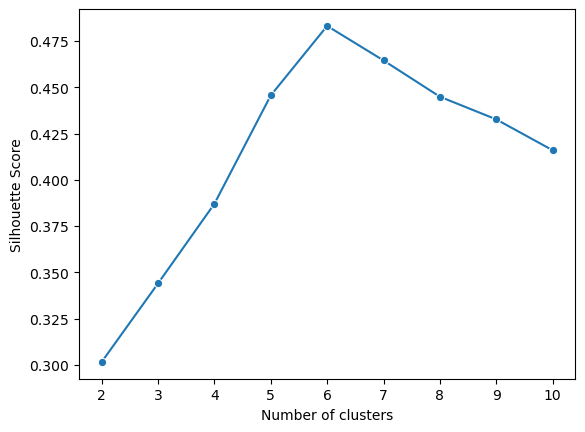

In [63]:
plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel('Number of clusters')
plot.set_ylabel('Silhouette Score')

The plot indicates that the silhouette score is closest to 1 when the data is partitioned into six clusters, although 7 could be a plausible alternative.



In [65]:
kmeans6 = KMeans(n_clusters = 6, random_state=42)
kmeans6.fit(X_scaled)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [66]:
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


In [74]:
encoded_df['cluster'] = kmeans6.labels_
encoded_df.head()

,Unnamed: 0,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_FEMALE,sex_MALE,cluster
0,1,Adelie,39.1,18.7,181.0,3750.0,2007,0,1,3
1,2,Adelie,39.5,17.4,186.0,3800.0,2007,1,0,0
2,3,Adelie,40.3,18.0,195.0,3250.0,2007,1,0,0
4,5,Adelie,36.7,19.3,193.0,3450.0,2007,1,0,0
5,6,Adelie,39.3,20.6,190.0,3650.0,2007,0,1,3


In [77]:
grouped_data = encoded_df.groupby(by = ['cluster','species']).size()
grouped_data

cluster  species  
0        Adelie       73
1        Chinstrap    34
2        Gentoo       61
3        Adelie       73
4        Gentoo       58
5        Chinstrap    34
dtype: int64

<Axes: title={'center': 'Clusters differentiated by species'}, xlabel='(Cluster, Species)', ylabel='Size'>

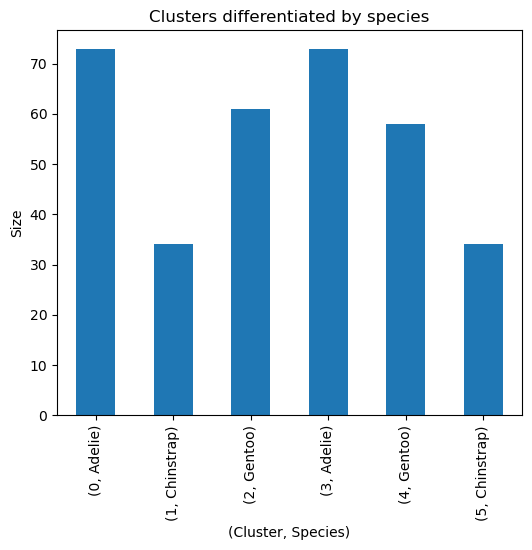

In [79]:
grouped_data.plot.bar(title='Clusters differentiated by species', figsize = (6, 5), ylabel = 'Size', xlabel = '(Cluster, Species)')

In [80]:
encoded_df.groupby(by = ['cluster','species','sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
0        Adelie     0           73
3        Adelie     1           73
2        Gentoo     1           61
4        Gentoo     0           58
1        Chinstrap  1           34
5        Chinstrap  0           34
dtype: int64

<Axes: title={'center': 'Clusters differentiated by species and sex'}, xlabel='(Cluster, Sex)', ylabel='Size'>

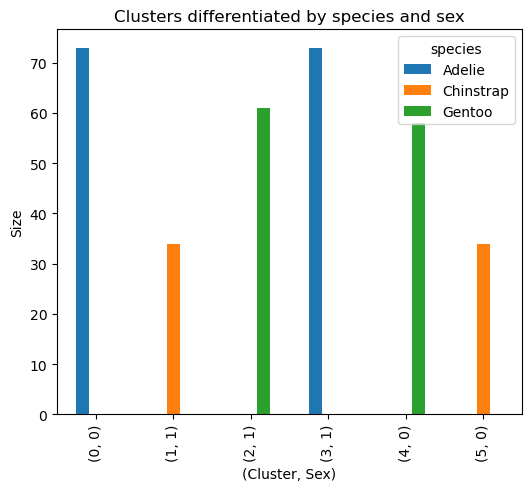

In [81]:
encoded_df.groupby(by = ['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value = 0).plot.bar(title = 'Clusters differentiated by species and sex',
                                                                                                                      figsize = (6, 5),
                                                                                                                      ylabel = 'Size',
                                                                                                                      xlabel = '(Cluster, Sex)')

## Conclusions

> Inertia and Silhouette score combined can be really useful in finding the optimal value of clusters.
> Clusters in this notebook are mostly differentiated by species and sex as shown by the groupby results and the graphs.
> The elbow plot and especially the silhouette scores suggest that 6 clusters are optimal for this data.
> Furthermore 6 clusters makes sense due to there being a degree of sexual dimoprhism for each of the three species so 2 sexes for each species would equal 6.